# Pydynamo Tutorial
Here are presented some basic usage of pydynamo, to describe and simulate a simple model. 

It's the Brand and Taylor model (BT), designed to model dynamics of Easter Island. See _Brander, James A., Taylor, M. Scott, 1998. The simple economics of Easter Island_

## Define and simulate the model

In [2]:
# Import the System object
from pydynamo import System

In [3]:
# Define equations for the model, in a file or a function
def BTmodel_eqs():
    # Define the constants
    beta = 0.4 # Proportion of labor dedicated to harvest
    r = 0.04 # Nature repoduction speed rate
    b_d = -0.1 # Default birth rate minus death rate
    phi = 4 # Fertility per consumption per worker
    K = 12_000 # Nature maximal carrying capacity
    alpha = 1e-5 # Harvest labor efficiency per resource avalability
    
    # Define the variables update equations
    S.k = S.j + dt*(S.j*r*(1 - S.j/K) - H.j) # Resource
    L.k = L.j + dt*L.j*(b_d + F.k) # Labor force (~ population)
    H.k = alpha*beta*L.j*S.k # Harvest
    F.k = phi*H.k/L.j # Fertility
    
    # Initialisation
    S.i = K
    L.i = 50
    initial_time=0

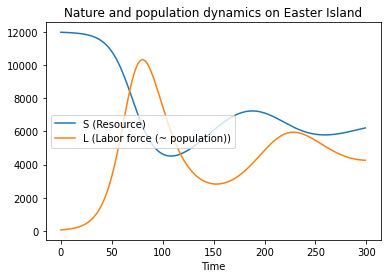

In [4]:
# Create an instance of the model, simulate it and plot it
s = System(BTmodel_eqs)
s.run(N=300, dt=1)
s.plot(['S', 'L'], title='Nature and population dynamics on Easter Island')

## Change a simulation and compare 2 plots

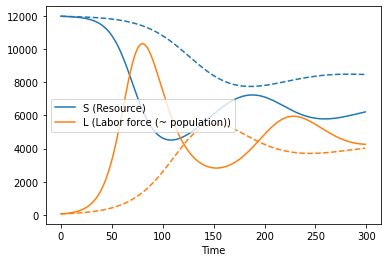

In [5]:
# Change some constants, run again and compare
s2 = s.copy()
s2.beta = 0.3
s2.run(300, 1)
s.plot_compare(s2, ['S', 'L'])

## Add new politics

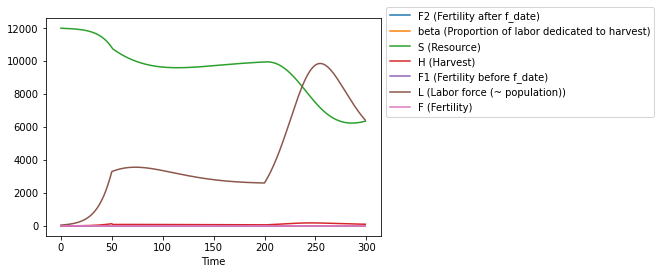

In [6]:
# Add a change on a variable from a specific date
s = System(BTmodel_eqs)
s.new_politic('beta', 50, 0.25) # New value for a constant
s.new_politic('F', 200, 'phi*H.k/L.j*1.4') # New euqation for a variable
s.run(300, 1)
s.plot()

## Add user defined functions

In [7]:
# Define new equations with a specific format.
# The name has to be update_VARIABLE_NAME, or init_VARIABLE_NAME, or set_CONSTANT_NAME
# The parameters used have to end by _k for variable at current step, _j for variable at former step, 
def update_F(H_k, L_j, phi, d_br_k, b_d):
    """Fertility
    Fertility is designed to reach -b_d when the desired birth_rate is null.
    """
    return (H_k*phi/L_j + b_d)*d_br_k - b_d

def update_d_br(L_j, b_d, o_L):
    """Desired Birth Rate
    A normalized distance to the optimal population value."""
    return (o_L - L_j)/o_L

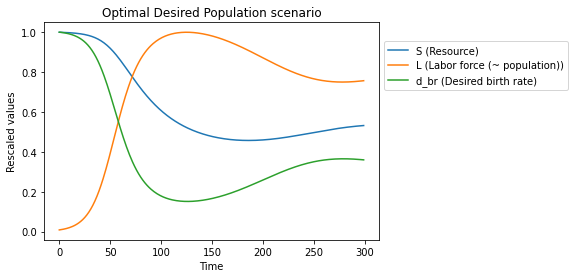

In [8]:
# Functions can then be added to the system
s = System(BTmodel_eqs)
s.update_F = update_F
s.update_d_br = update_d_br

s.o_L = 7000
s.run(300, 1)
s.plot(['S', 'L', 'd_br'], rescale = True, title='Optimal Desired Population scenario')

## Show update graph

In [9]:
# Show the graph of influences
s.show_influence_graph(options=[]).show('ex.html')